In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [5]:
df = pd.read_csv("C:/Users/ASUS/Desktop/DSA4266/Phishing data/combined_data.csv",  lineterminator='\n')

In [6]:
# Download required nltk resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove URLs
    text = re.sub(r'(http|https)://(?:www\.)?\S+|www\.\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'\W+', ' ', text)
    # Tokenization
    tokens = text.split()
    # Lemmatization and removing stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the function to the 'subject' and 'body' columns
df['subject_clean'] = df['subject'].apply(preprocess_text)
df['body_clean'] = df['body'].apply(preprocess_text)

# Check the cleaned text
print(df[['subject_clean', 'body_clean']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                           subject_clean  \
0  fw june 29 bna inc daily labor report   
1                      ngx failover plan   
2                          intranet site   
3    fw ena upstream company information   
4                    new master physical   

                                          body_clean  
0  user id enrondlr pw bnaweb22 original message ...  
1  hi chris tonight rolling new report currently ...  
2  rika r new original message thomas paul sent f...  
3  john gerald currently trading gtc spot contrac...  
4  gerald stacy attached worksheet new master phy...  


In [7]:
X = df['body_clean']
y = df['label']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,shuffle=True,stratify=y,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120372,), (51589,), (120372,), (51589,))

In [8]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Adjust 'max_features' as needed

# Fit and transform on the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data (without fitting to avoid data leakage)
X_test_tfidf = tfidf.transform(X_test)

# Check the shapes
X_train_tfidf.shape, X_test_tfidf.shape

((120372, 5000), (51589, 5000))

Logistic Regression - Accuracy: 0.9678032138634205
Logistic Regression - Precision: 0.9628579645835901
Logistic Regression - ROC-AUC: 0.9947123909672844


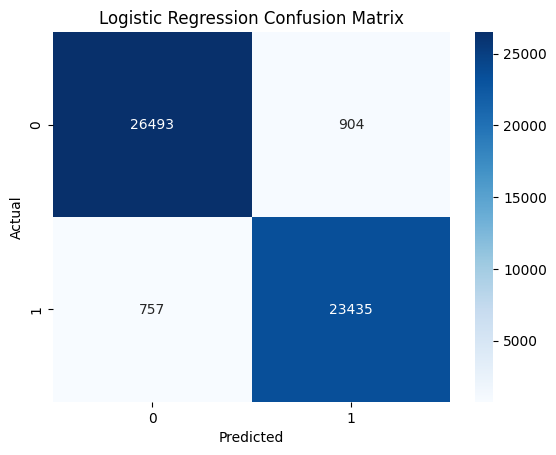

In [9]:
# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_tfidf)
y_pred_lr_proba = lr_model.predict_proba(X_test_tfidf)[:, 1]  # For ROC-AUC

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Precision
precision_lr = precision_score(y_test, y_pred_lr)

# ROC-AUC
roc_auc_lr = roc_auc_score(y_test, y_pred_lr_proba)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Print results
print(f"Logistic Regression - Accuracy: {accuracy_lr}")
print(f"Logistic Regression - Precision: {precision_lr}")
print(f"Logistic Regression - ROC-AUC: {roc_auc_lr}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest - Accuracy: 0.9731338075946423
Random Forest - Precision: 0.9798434606968524
Random Forest - ROC-AUC: 0.9966516778366901


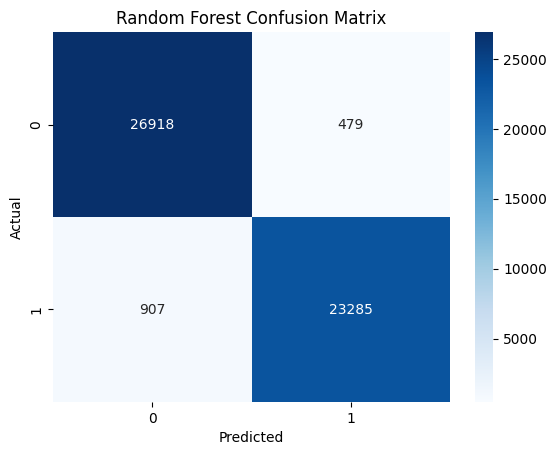

In [10]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_tfidf)
y_pred_rf_proba = rf_model.predict_proba(X_test_tfidf)[:, 1]  # For ROC-AUC

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Precision
precision_rf = precision_score(y_test, y_pred_rf)

# ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print results
print(f"Random Forest - Accuracy: {accuracy_rf}")
print(f"Random Forest - Precision: {precision_rf}")
print(f"Random Forest - ROC-AUC: {roc_auc_rf}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

XGBoost - Accuracy: 0.9621818604741321
XGBoost - Precision: 0.9476671631576828
XGBoost - ROC-AUC: 0.9937122298660515


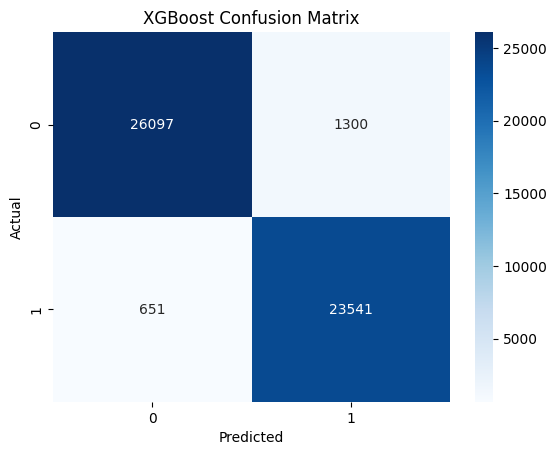

In [12]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_tfidf)
y_pred_xgb_proba = xgb_model.predict_proba(X_test_tfidf)[:, 1]  # For ROC-AUC

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Precision
precision_xgb = precision_score(y_test, y_pred_xgb)

# ROC-AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb_proba)

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print results
print(f"XGBoost - Accuracy: {accuracy_xgb}")
print(f"XGBoost - Precision: {precision_xgb}")
print(f"XGBoost - ROC-AUC: {roc_auc_xgb}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import FeatureUnion

# Initialize CountVectorizer (BoW) and TfidfVectorizer (TF-IDF)
bow_vectorizer = CountVectorizer(max_features=5000)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Combine BoW and TF-IDF using FeatureUnion
combined_features = FeatureUnion([
    ('bow', bow_vectorizer),
    ('tfidf', tfidf_vectorizer)
])

# Fit and transform the training data
X_train_combined = combined_features.fit_transform(X_train)

# Transform the test data (without fitting to avoid data leakage)
X_test_combined = combined_features.transform(X_test)


Logistic Regression - Accuracy: 0.9716606253271046
Logistic Regression - Precision: 0.9632724604598076
Logistic Regression - ROC-AUC: 0.9922712047159125


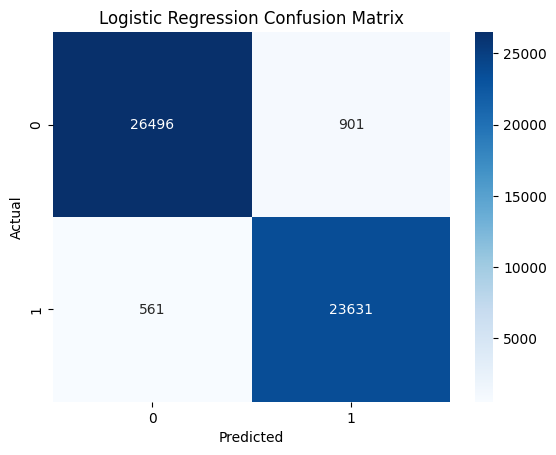

In [14]:
# Initialize Logistic Regression
lr_model = LogisticRegression(max_iter=1000)

# Train the model on the combined features
lr_model.fit(X_train_combined, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_combined)
y_pred_lr_proba = lr_model.predict_proba(X_test_combined)[:, 1]  # For ROC-AUC

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Precision
precision_lr = precision_score(y_test, y_pred_lr)

# ROC-AUC
roc_auc_lr = roc_auc_score(y_test, y_pred_lr_proba)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Print results
print(f"Logistic Regression - Accuracy: {accuracy_lr}")
print(f"Logistic Regression - Precision: {precision_lr}")
print(f"Logistic Regression - ROC-AUC: {roc_auc_lr}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest - Accuracy: 0.9735990230475489
Random Forest - Precision: 0.9798234552332913
Random Forest - ROC-AUC: 0.996710723846536


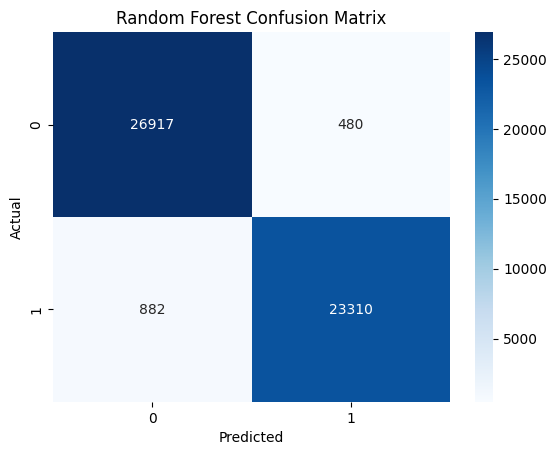

In [15]:
# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=200)

# Train the model on the combined features
rf_model.fit(X_train_combined, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_combined)
y_pred_rf_proba = rf_model.predict_proba(X_test_combined)[:, 1]  # For ROC-AUC

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Precision
precision_rf = precision_score(y_test, y_pred_rf)

# ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print results
print(f"Random Forest - Accuracy: {accuracy_rf}")
print(f"Random Forest - Precision: {precision_rf}")
print(f"Random Forest - ROC-AUC: {roc_auc_rf}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


XGBoost - Accuracy: 0.9629572195623098
XGBoost - Precision: 0.9495944146252876
XGBoost - ROC-AUC: 0.9937681240395726


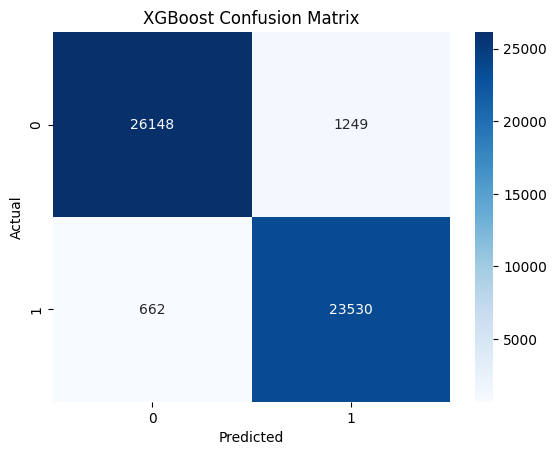

In [16]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Train the model on the combined features
xgb_model.fit(X_train_combined, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_combined)
y_pred_xgb_proba = xgb_model.predict_proba(X_test_combined)[:, 1]  # For ROC-AUC

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Precision
precision_xgb = precision_score(y_test, y_pred_xgb)

# ROC-AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb_proba)

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print results
print(f"XGBoost - Accuracy: {accuracy_xgb}")
print(f"XGBoost - Precision: {precision_xgb}")
print(f"XGBoost - ROC-AUC: {roc_auc_xgb}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
